In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
infiles = {
    'ACCESS-CM2': '/g/data/xv83/dbi599/treasury/SPEI/ACCESS-CM2/ssp370/spei_mon_ACCESS-CM2_ssp370_ensemble_aus-states_1850-2100.csv',
    'MPI-ESM1-2-LR' : '/g/data/xv83/dbi599/treasury/SPEI/MPI-ESM1-2-LR/ssp370/spei_mon_MPI-ESM1-2-LR_ssp370_ensemble_aus-states_1850-2100.csv',
}

In [5]:
df_dict = {}
df_dict['ACCESS-CM2'] = pd.read_csv(infiles['ACCESS-CM2'])
df_dict['MPI-ESM1-2-LR'] = pd.read_csv(infiles['MPI-ESM1-2-LR'])

In [6]:
df_dict['ACCESS-CM2']

,year,month,model,run,experiment,NSW,VIC,QLD,SA,WA,TAS,NT,AUS
0,1850,1,ACCESS-CM2,r10i1p1f1,historical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1850,2,ACCESS-CM2,r10i1p1f1,historical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1850,3,ACCESS-CM2,r10i1p1f1,historical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1850,4,ACCESS-CM2,r10i1p1f1,historical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1850,5,ACCESS-CM2,r10i1p1f1,historical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30115,2100,8,ACCESS-CM2,r9i1p1f1,ssp370,-0.32,-1.38,-1.04,-1.64,-2.61,-1.84,-1.31,-1.62
30116,2100,9,ACCESS-CM2,r9i1p1f1,ssp370,-0.17,-1.39,-1.03,-1.65,-2.44,-1.86,-1.34,-1.56
30117,2100,10,ACCESS-CM2,r9i1p1f1,ssp370,-0.14,-1.32,-1.04,-1.66,-2.58,-1.95,-1.45,-1.62
30118,2100,11,ACCESS-CM2,r9i1p1f1,ssp370,-0.15,-1.08,-0.88,-1.48,-2.18,-1.68,-1.56,-1.44


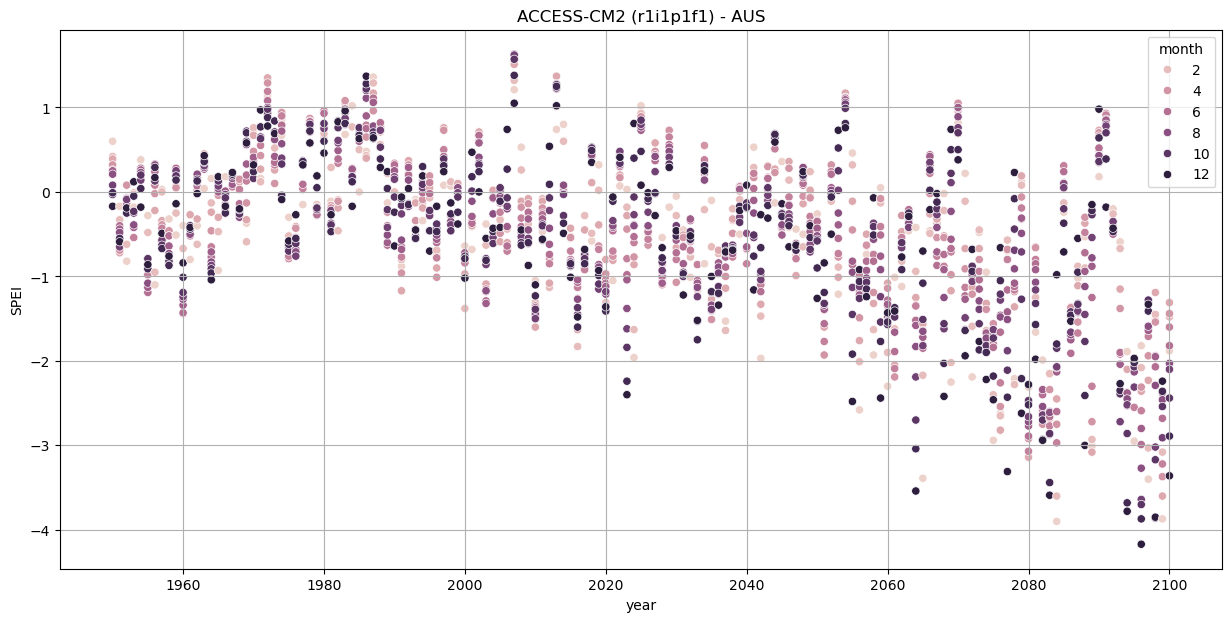

In [15]:
fig, ax = plt.subplots(figsize=[15,7])
df = df_dict['ACCESS-CM2']
sns.scatterplot(
    ax=ax,
    data=df[(df['year'] >= 1950) & (df['run'] == 'r1i1p1f1')],
    x='year',
    y='AUS',
    hue='month',
)
ax.set_ylabel('SPEI')
ax.set_title('ACCESS-CM2 (r1i1p1f1) - AUS')
ax.grid()
plt.show()

In [16]:
def plot_location(model, location, start_year=1950, annual_mean=True):
    """Scatterplot for a given location"""

    df = df_dict[model]
    df = df[df['year'] >= start_year]
    if annual_mean:
        df = df.drop(['month', 'model', 'experiment'], axis=1).groupby(['year', 'run']).mean()
    fig, ax = plt.subplots(figsize=[15,7])
    sns.scatterplot(
        ax=ax,
        data=df,
        x='year',
        y=location,
        hue='run',
    )
    ax.set_ylabel('SPEI')
    ax.set_title(f'{model} - {location}')
    ax.grid()
    plt.show()

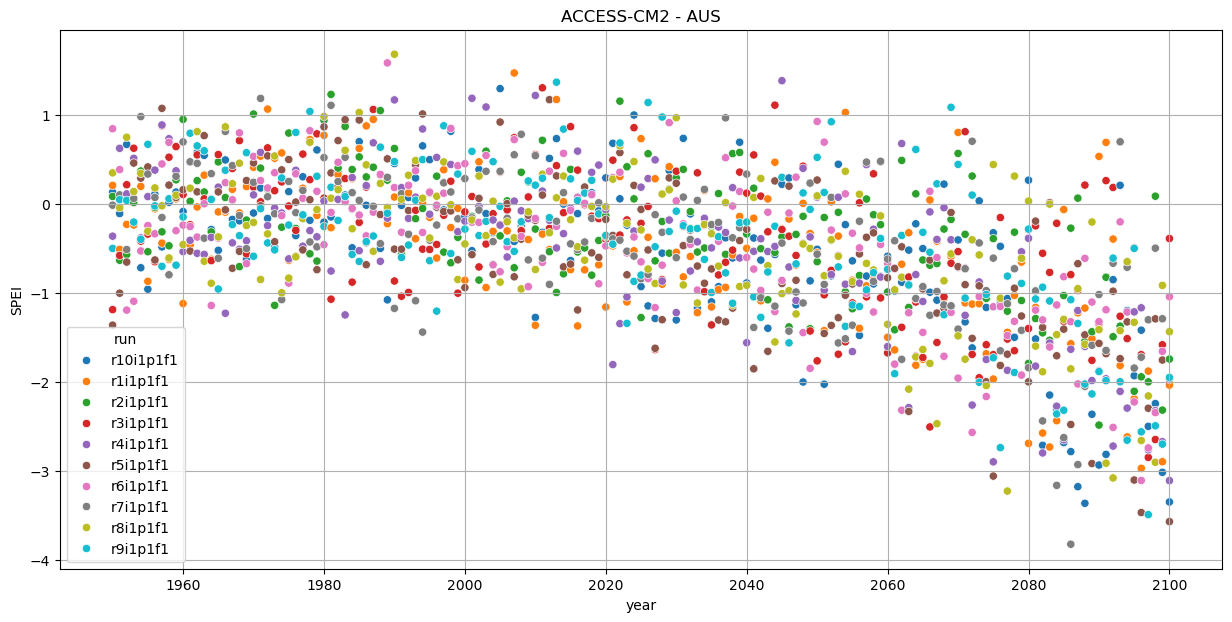

In [17]:
plot_location('ACCESS-CM2', 'AUS')

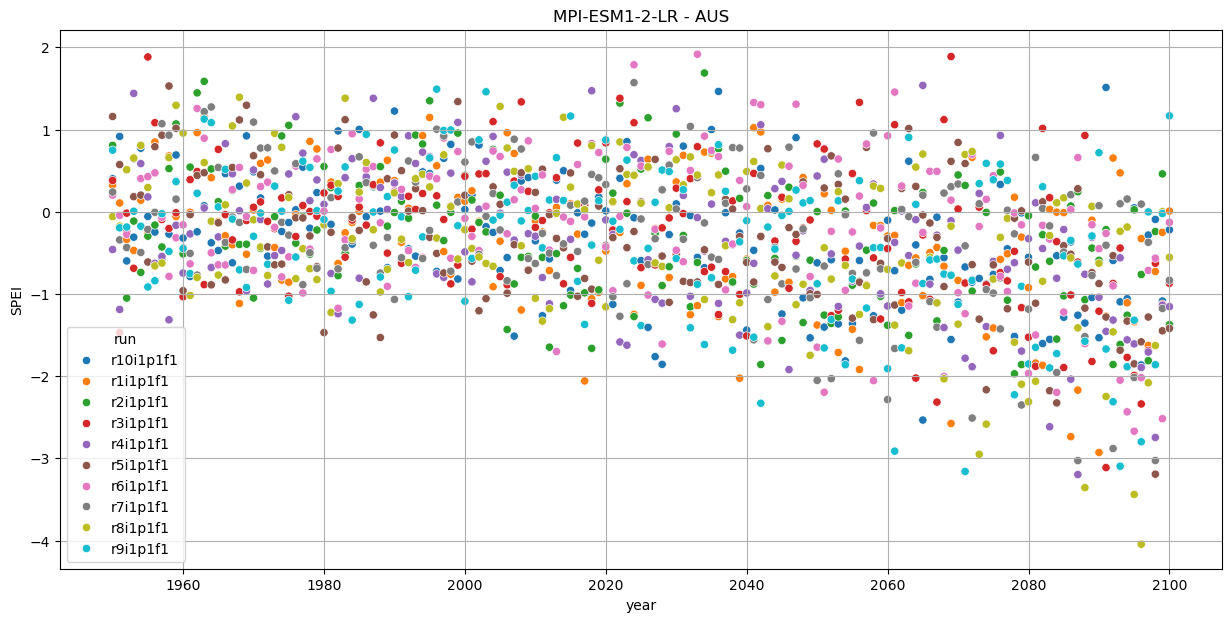

In [18]:
plot_location('MPI-ESM1-2-LR', 'AUS')

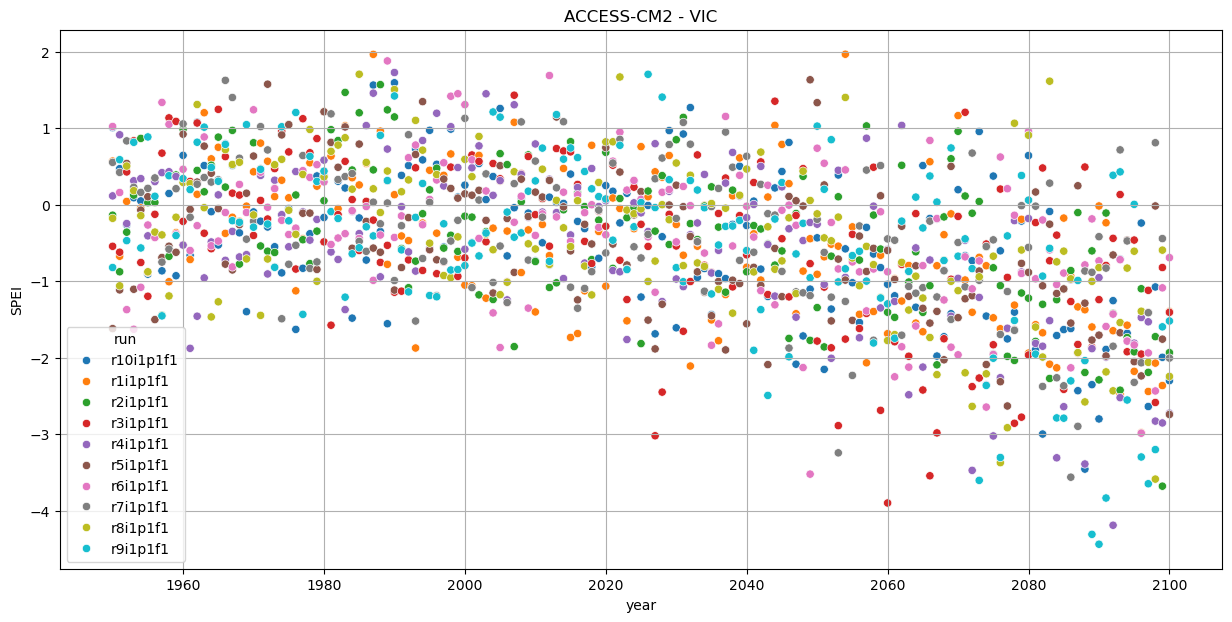

In [19]:
plot_location('ACCESS-CM2', 'VIC')

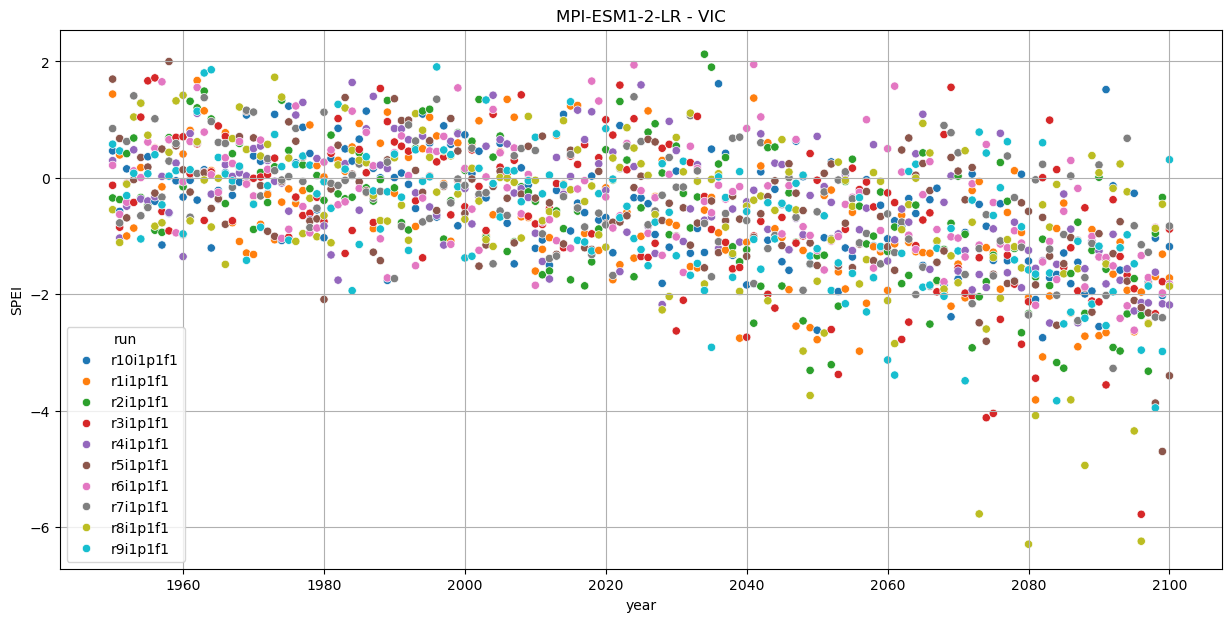

In [20]:
plot_location('MPI-ESM1-2-LR', 'VIC')